In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sys
np.set_printoptions(threshold=sys.maxsize)

from scipy.stats import mode

In [2]:
# pip install threadpoolctl --upgrade

In [3]:
data = pd.read_csv("sonar.all-data.csv", header=None)

columns = []

for i in range(61):
    if(i==60):
        columns.append("Label")
    else:
        columns.append(i)
data.columns = columns
data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [4]:
data['Label'] = data['Label'].map({ 'R': 0,
                                    'M': 1})

In [5]:
data.isna().sum().sum()

0

In [6]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,Label
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.533654
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,1.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


In [7]:
data.dtypes

0        float64
1        float64
2        float64
3        float64
4        float64
          ...   
56       float64
57       float64
58       float64
59       float64
Label      int64
Length: 61, dtype: object

# Q1

In [9]:
data['Label']

0      0
1      0
2      0
3      0
4      0
      ..
203    1
204    1
205    1
206    1
207    1
Name: Label, Length: 208, dtype: int64

In [10]:
data1_X = data.drop(columns="Label", axis=1)
data1_Y = data["Label"]

X_train, X_test, Y_train, Y_test = train_test_split(data1_X, data1_Y, test_size=0.2, random_state=40)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(166, 60) (42, 60) (166,) (42,)


In [9]:
Y_train = Y_train.to_numpy()

a) With inbuilt function

In [10]:
k = [1, 3, 5, 7]

for i in range(len(k)):
    clf = KNeighborsClassifier(k[i])
    clf.fit(X_train, Y_train)
    
    Y_pred = clf.predict(X_test)
    print(str(k[i]) + "NN Accuracy: " + str(accuracy_score(Y_test, Y_pred)))

1NN Accuracy: 0.8571428571428571
3NN Accuracy: 0.8095238095238095
5NN Accuracy: 0.7619047619047619
7NN Accuracy: 0.7380952380952381


b) without inbuilt function

In [11]:
data1_b = data
data1_bX = data1_b.iloc[:,:-1].values
data1_bY = data1_b.iloc[:,-1:].values


b_X_train, b_X_test, b_Y_train, b_Y_test = train_test_split(data1_bX, data1_bY, test_size=0.2, random_state=40)

print(b_X_train.shape, b_X_test.shape, b_Y_train.shape, b_Y_test.shape)

(166, 60) (42, 60) (166, 1) (42, 1)


In [12]:
class KNN_self():
    
    def __init__(self, K):
        self.K = K

    # Function to store training set
    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train
        
        # m = Size of training set, n = no_of_features
        self.m, self.n = X_train.shape
        
    # Function for prediction
    def predict(self, X_test):
        self.X_test = X_test
        
        # no_of_test_examples, no_of_features
        self.m_test, self.n = X_test.shape
        
        # initialize Y_predict
        Y_predict = np.zeros(self.m_test)
        
        for i in range(self.m_test):
            x = self.X_test[i]
            # find the K nearest neighbors from current test example
            neighbors = np.zeros(self.K)
            neighbors = self.find_neighbors(x)
            # most frequent class in K neighbors
            Y_predict[i] = mode(neighbors)[0][0]
            
        return Y_predict

    # Function to find the K nearest neighbors to current test example
    def find_neighbors(self, x):
        # calculate all the euclidean distances between current
        # test example x and training set X_train
        euclidean_distances = np.zeros(self.m)
        
        for i in range(self.m):
            d = self.euclidean(x, self.X_train[i])
            euclidean_distances[i] = d

        # sort Y_train according to euclidean_distance_array and
        # store into Y_train_sorted
        inds = euclidean_distances.argsort()
        Y_train_sorted = self.Y_train[inds]
        
        return Y_train_sorted[:self.K]

    # Function to calculate euclidean distance
    def euclidean(self, x, x_train):
        return np.sqrt(np.sum(np.square(x - x_train)))

In [13]:
k = [1, 3, 5, 7]

for i in range(len(k)):
    model = KNN_self(K=k[i])
    model.fit(b_X_train, b_Y_train )

    # Prediction on test set
    b_Y_pred = model.predict(b_X_test)

    # measure performance    
    correctly_classified = 0

    # counter
    count = 0

    for count in range(np.size(b_Y_pred)) :
        if b_Y_test[count] == b_Y_pred[count] :
            correctly_classified = correctly_classified + 1
        count = count + 1

    print(str(k[i]) + "NN Accuracy: ", (correctly_classified / count) * 100 )

1NN Accuracy:  85.71428571428571
3NN Accuracy:  80.95238095238095
5NN Accuracy:  76.19047619047619
7NN Accuracy:  73.80952380952381


# Q2

In [14]:
data2 = data
data2

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,1
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,1
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,1
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,1


In [15]:
data2_1X = data2.iloc[:, 0:10]
data2_2X = data2.iloc[:, 10:20]
data2_3X = data2.iloc[:, 20:30]
data2_4X = data2.iloc[:, 30:40]
data2_5X = data2.iloc[:, 40:50]
data2_6X = data2.iloc[:, 50:60]

data2_Y = data2.iloc[:, 60]

In [16]:
datasets = ["data2_1X", "data2_2X", "data2_3X", "data2_4X", "data2_5X", "data2_6X"]

for i in range(len(datasets)):
    print("Subset " + str(i+1) + " : ")
    X_train, X_test, Y_train, Y_test = train_test_split(eval(datasets[i]), data2_Y, test_size=0.2, random_state=40)

#     print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
    k = [1, 3, 5, 7]
    
    for i in range(len(k)):
        clf = KNeighborsClassifier(k[i])
        clf.fit(X_train, Y_train)

        Y_pred = clf.predict(X_test)
        print(str(k[i]) + " NN Accuracy: " + str(accuracy_score(Y_test, Y_pred)))

Subset 1 : 
1 NN Accuracy: 0.6904761904761905
3 NN Accuracy: 0.6666666666666666
5 NN Accuracy: 0.6904761904761905
7 NN Accuracy: 0.6428571428571429
Subset 2 : 
1 NN Accuracy: 0.7857142857142857
3 NN Accuracy: 0.8809523809523809
5 NN Accuracy: 0.8095238095238095
7 NN Accuracy: 0.8095238095238095
Subset 3 : 
1 NN Accuracy: 0.7380952380952381
3 NN Accuracy: 0.7142857142857143
5 NN Accuracy: 0.7142857142857143
7 NN Accuracy: 0.6666666666666666
Subset 4 : 
1 NN Accuracy: 0.5476190476190477
3 NN Accuracy: 0.6904761904761905
5 NN Accuracy: 0.7142857142857143
7 NN Accuracy: 0.6666666666666666
Subset 5 : 
1 NN Accuracy: 0.7142857142857143
3 NN Accuracy: 0.6666666666666666
5 NN Accuracy: 0.6904761904761905
7 NN Accuracy: 0.7142857142857143
Subset 6 : 
1 NN Accuracy: 0.6428571428571429
3 NN Accuracy: 0.6190476190476191
5 NN Accuracy: 0.5714285714285714
7 NN Accuracy: 0.6904761904761905


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(data2_2X, data2_Y, test_size=0.2, random_state=40)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

k = [1, 3, 5, 7]

for i in range(len(k)):
    clf = KNeighborsClassifier(k[i])
    clf.fit(X_train, Y_train)
    
    Y_pred = clf.predict(X_test)
    print(str(k[i]) + "NN Accuracy: " + str(accuracy_score(Y_test, Y_pred)))

(166, 10) (42, 10) (166,) (42,)
1NN Accuracy: 0.7857142857142857
3NN Accuracy: 0.8809523809523809
5NN Accuracy: 0.8095238095238095
7NN Accuracy: 0.8095238095238095


# Q3

In [18]:
from sklearn import metrics

In [19]:
data3 = data

data3_1X = data3.iloc[:, 0:10]
data3_2X = data3.iloc[:, 10:20]
data3_3X = data3.iloc[:, 20:30]
data3_4X = data3.iloc[:, 30:40]
data3_5X = data3.iloc[:, 40:50]
data3_6X = data3.iloc[:, 50:60]

data3_Y = data3.iloc[:, 60]

In [20]:
datasets = ["data3_1X", "data3_2X", "data3_3X", "data3_4X", "data3_5X", "data3_6X"]

Subset 1 : 


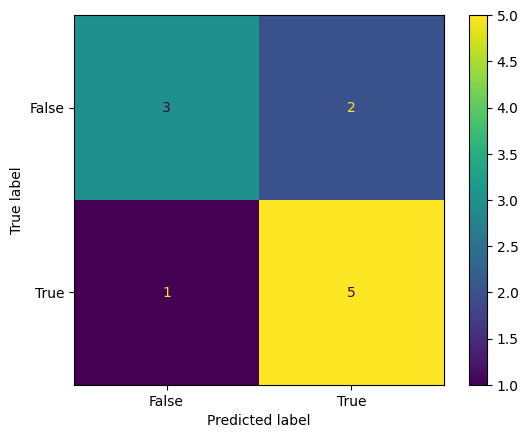

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [0 1 1 0 1 1 1 1 0 0 1]
1NN Accuracy: 0.7272727272727273
Subset 2 : 


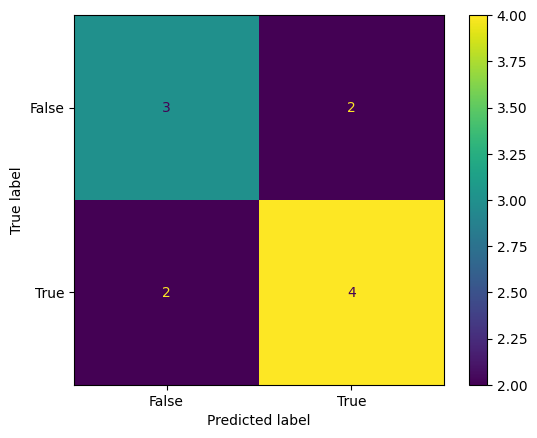

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [1 1 0 0 1 1 1 0 0 0 1]
1NN Accuracy: 0.6363636363636364
Subset 3 : 


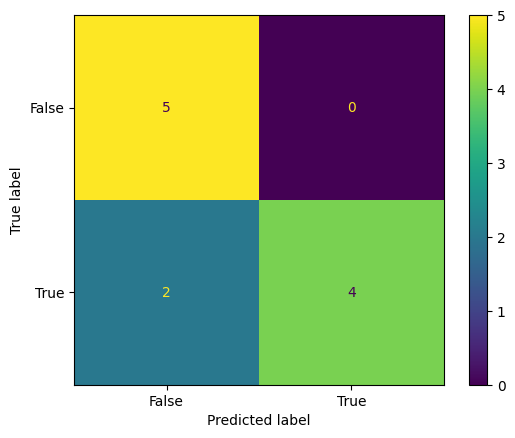

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [0 0 0 0 1 0 1 0 1 0 1]
1NN Accuracy: 0.8181818181818182
Subset 4 : 


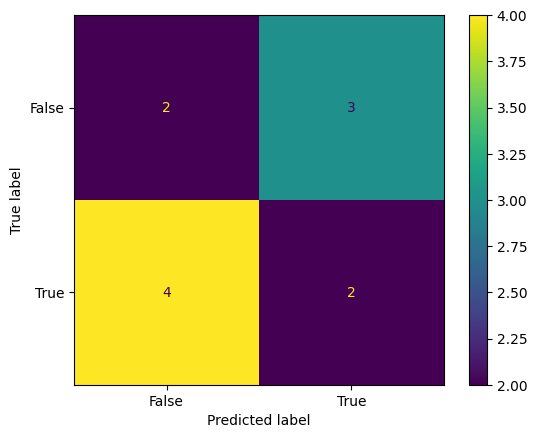

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [0 1 1 1 1 0 1 0 0 0 0]
1NN Accuracy: 0.36363636363636365
Subset 5 : 


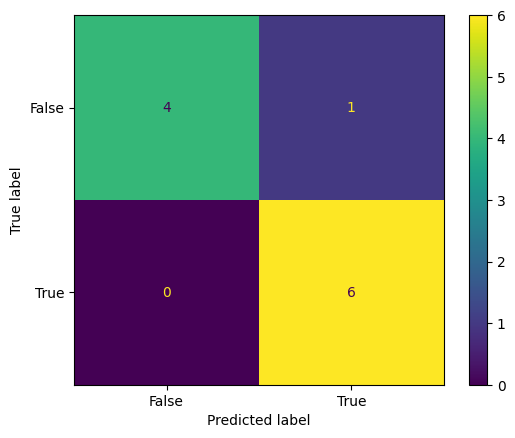

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [0 1 0 0 1 1 1 1 1 0 1]
1NN Accuracy: 0.9090909090909091
Subset 6 : 


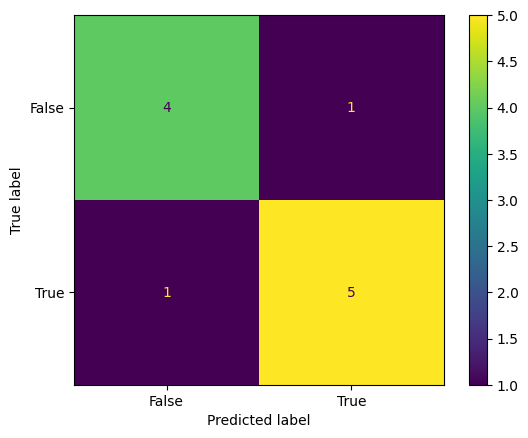

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [0 0 0 0 1 1 0 1 1 1 1]
1NN Accuracy: 0.8181818181818182


In [21]:
predicted_results = []
for i in range(len(datasets)):
    print("Subset " + str(i+1) + " : ")
    X_train, X_test, Y_train, Y_test = train_test_split(eval(datasets[i]), data2_Y, test_size=0.05, random_state=40)

    clf = KNeighborsClassifier(1)
    clf.fit(X_train, Y_train)

    Y_pred = clf.predict(X_test)
    predicted_results.append(Y_pred)
    
    confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()
    plt.show()
    
    print("Actual:   ", Y_test.to_numpy())
    print("Predicted:", Y_pred)
    print("1NN Accuracy: " + str(accuracy_score(Y_test, Y_pred)))

ans = []
for i in range(len(predicted_results[0])):
    count0 = 0
    count1 = 0
    
    for j in range(len(predicted_results)):
        if(predicted_results[j][i] == 0):
            count0 += 1
        else:
            count1 += 1
            
    ans.append(0 if(count0>count1) else 1)

In [22]:
print("Majority Voting: ")
print("Original: ", Y_test.to_numpy())
print("Majority: ", np.array(ans))

Majority Voting: 
Original:  [0 0 0 0 1 1 1 1 1 0 1]
Majority:  [0 1 0 0 1 1 1 1 1 0 1]


Subset 1 : 


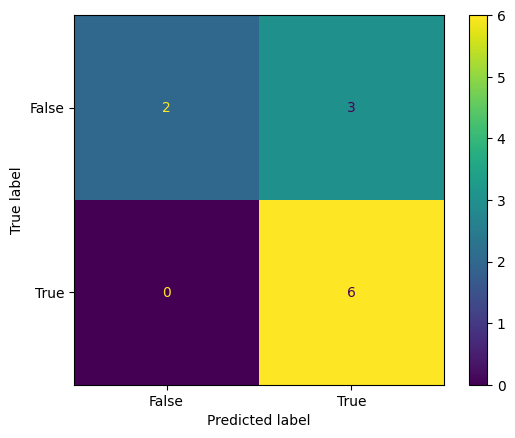

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [0 1 1 1 1 1 1 1 1 0 1]
3NN Accuracy: 0.7272727272727273
Subset 2 : 


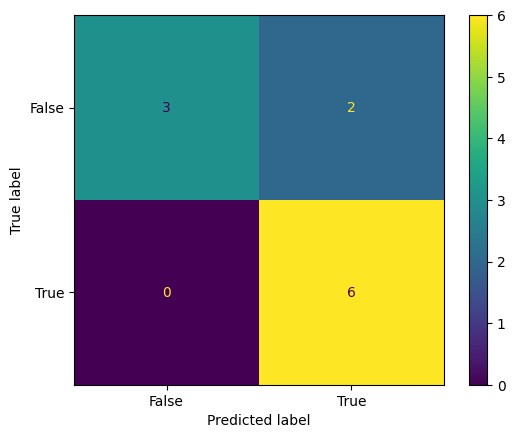

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [1 1 0 0 1 1 1 1 1 0 1]
3NN Accuracy: 0.8181818181818182
Subset 3 : 


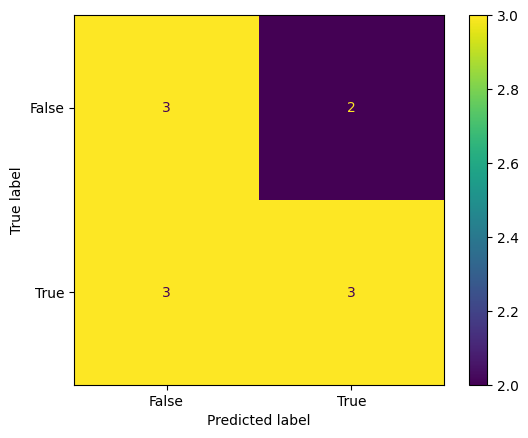

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [0 1 0 0 1 0 1 0 1 1 0]
3NN Accuracy: 0.5454545454545454
Subset 4 : 


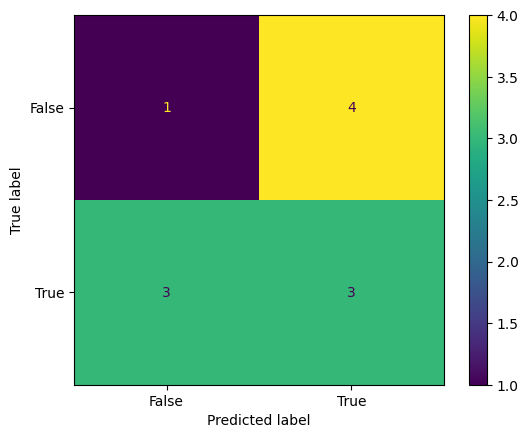

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [1 1 1 1 1 0 1 0 1 0 0]
3NN Accuracy: 0.36363636363636365
Subset 5 : 


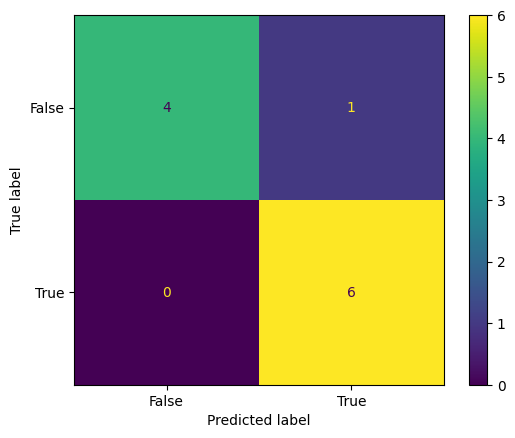

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [0 1 0 0 1 1 1 1 1 0 1]
3NN Accuracy: 0.9090909090909091
Subset 6 : 


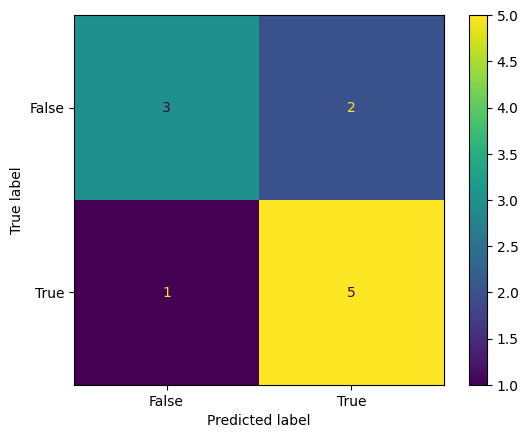

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [0 0 1 0 1 1 0 1 1 1 1]
3NN Accuracy: 0.7272727272727273
Majority Voting: 
Original:  [0 0 0 0 1 1 1 1 1 0 1]
Majority:  [0 1 1 0 1 1 1 1 1 0 1]


In [23]:
# 3NN
predicted_results = []
for i in range(len(datasets)):
    print("Subset " + str(i+1) + " : ")
    X_train, X_test, Y_train, Y_test = train_test_split(eval(datasets[i]), data2_Y, test_size=0.05, random_state=40)

    clf = KNeighborsClassifier(3)
    clf.fit(X_train, Y_train)

    Y_pred = clf.predict(X_test)
    predicted_results.append(Y_pred)
    
    confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()
    plt.show()
    
    print("Actual:   ", Y_test.to_numpy())
    print("Predicted:", Y_pred)
    print("3NN Accuracy: " + str(accuracy_score(Y_test, Y_pred)))

ans = []
for i in range(len(predicted_results[0])):
    count0 = 0
    count1 = 0
    
    for j in range(len(predicted_results)):
        if(predicted_results[j][i] == 0):
            count0 += 1
        else:
            count1 += 1
            
    ans.append(0 if(count0>count1) else 1)
    
print("Majority Voting: ")
print("Original: ", Y_test.to_numpy())
print("Majority: ", np.array(ans))

Subset 1 : 


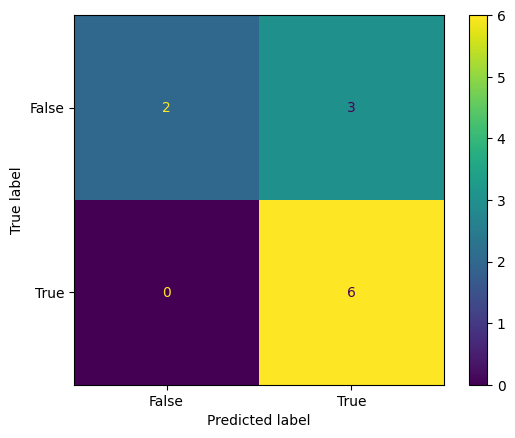

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [0 1 1 1 1 1 1 1 1 0 1]
5NN Accuracy: 0.7272727272727273
Subset 2 : 


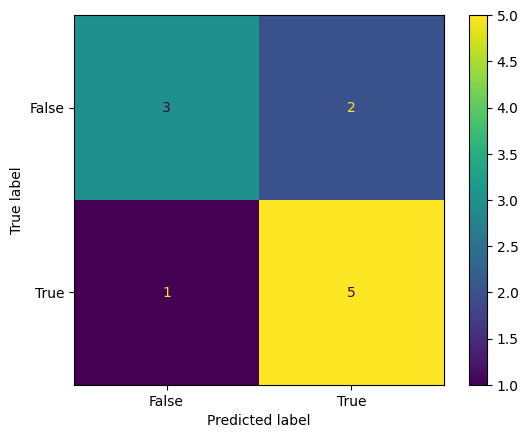

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [1 1 0 0 1 1 1 1 0 0 1]
5NN Accuracy: 0.7272727272727273
Subset 3 : 


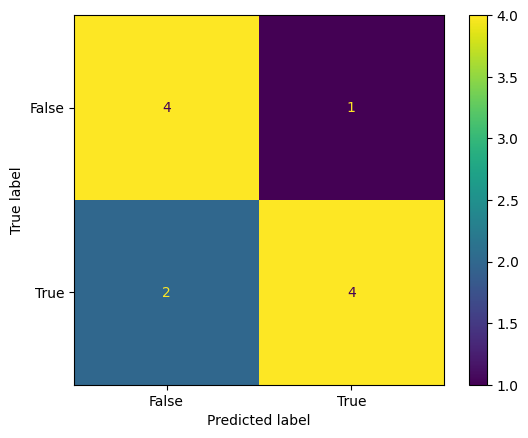

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [0 1 0 0 1 1 1 0 1 0 0]
5NN Accuracy: 0.7272727272727273
Subset 4 : 


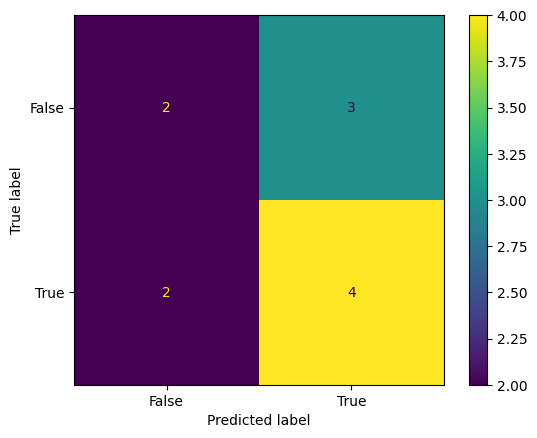

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [1 0 1 1 1 0 1 0 1 0 1]
5NN Accuracy: 0.5454545454545454
Subset 5 : 


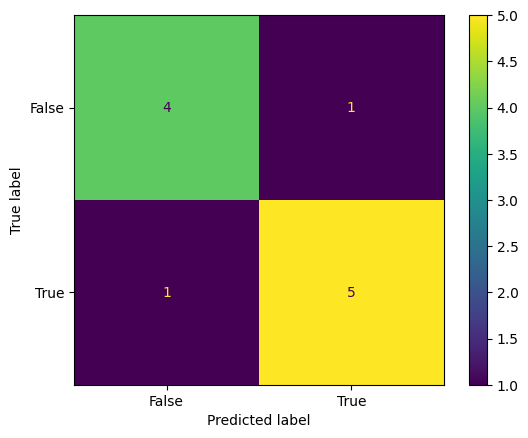

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [0 1 0 0 1 1 1 1 1 0 0]
5NN Accuracy: 0.8181818181818182
Subset 6 : 


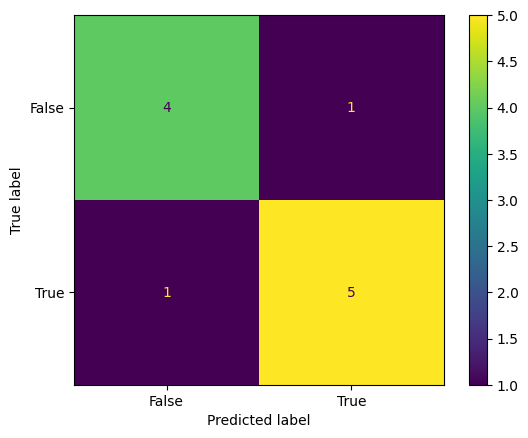

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [0 0 0 0 1 1 0 1 1 1 1]
5NN Accuracy: 0.8181818181818182
Majority Voting: 
Original:  [0 0 0 0 1 1 1 1 1 0 1]
Majority:  [0 1 0 0 1 1 1 1 1 0 1]


In [24]:
# 5NN
predicted_results = []
for i in range(len(datasets)):
    print("Subset " + str(i+1) + " : ")
    X_train, X_test, Y_train, Y_test = train_test_split(eval(datasets[i]), data2_Y, test_size=0.05, random_state=40)

    clf = KNeighborsClassifier(5)
    clf.fit(X_train, Y_train)

    Y_pred = clf.predict(X_test)
    predicted_results.append(Y_pred)
    
    confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()
    plt.show()
    
    print("Actual:   ", Y_test.to_numpy())
    print("Predicted:", Y_pred)
    print("5NN Accuracy: " + str(accuracy_score(Y_test, Y_pred)))

ans = []
for i in range(len(predicted_results[0])):
    count0 = 0
    count1 = 0
    
    for j in range(len(predicted_results)):
        if(predicted_results[j][i] == 0):
            count0 += 1
        else:
            count1 += 1
            
    ans.append(0 if(count0>count1) else 1)
    
print("Majority Voting: ")
print("Original: ", Y_test.to_numpy())
print("Majority: ", np.array(ans))

Subset 1 : 


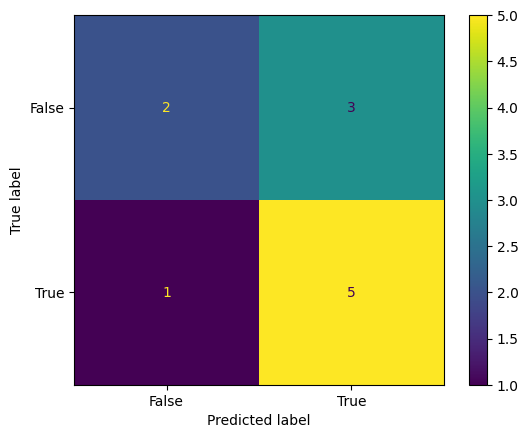

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [0 1 1 1 1 1 1 1 0 0 1]
7NN Accuracy: 0.6363636363636364
Subset 2 : 


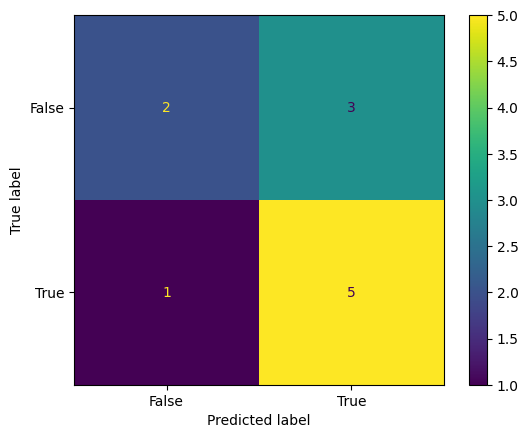

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [1 1 1 0 1 1 1 1 0 0 1]
7NN Accuracy: 0.6363636363636364
Subset 3 : 


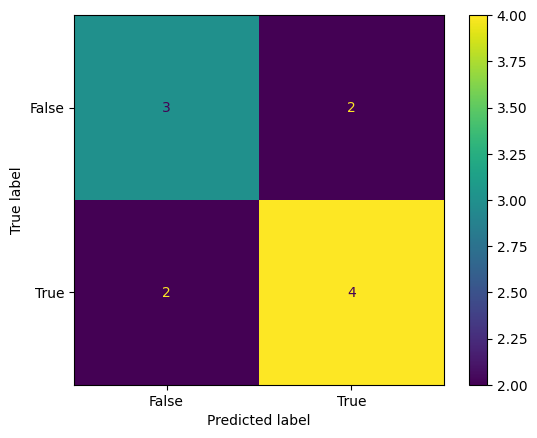

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [0 1 0 0 1 1 1 1 0 1 0]
7NN Accuracy: 0.6363636363636364
Subset 4 : 


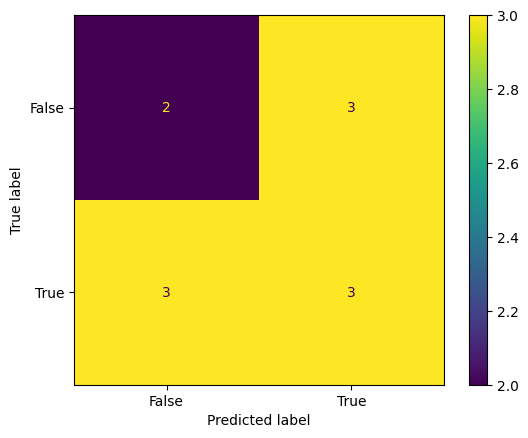

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [1 0 1 0 1 0 1 0 0 1 1]
7NN Accuracy: 0.45454545454545453
Subset 5 : 


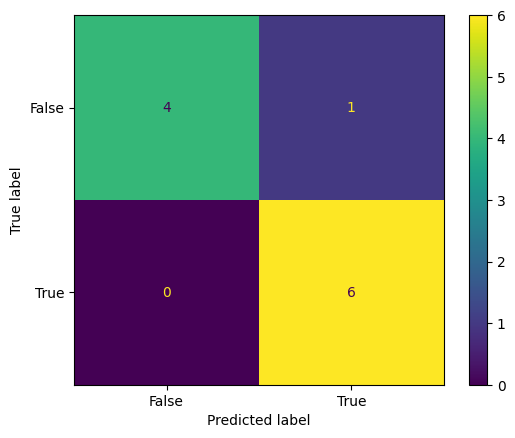

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [0 1 0 0 1 1 1 1 1 0 1]
7NN Accuracy: 0.9090909090909091
Subset 6 : 


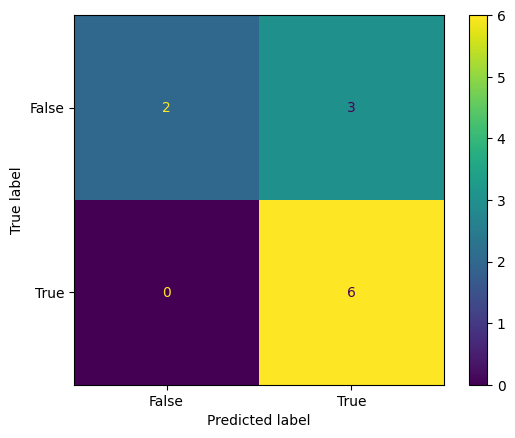

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [1 0 0 1 1 1 1 1 1 1 1]
7NN Accuracy: 0.7272727272727273
Majority Voting: 
Original:  [0 0 0 0 1 1 1 1 1 0 1]
Majority:  [1 1 1 0 1 1 1 1 0 1 1]


In [25]:
# 7NN
predicted_results = []
for i in range(len(datasets)):
    print("Subset " + str(i+1) + " : ")
    X_train, X_test, Y_train, Y_test = train_test_split(eval(datasets[i]), data2_Y, test_size=0.05, random_state=40)

    clf = KNeighborsClassifier(7)
    clf.fit(X_train, Y_train)

    Y_pred = clf.predict(X_test)
    predicted_results.append(Y_pred)
    
    confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()
    plt.show()
    
    print("Actual:   ", Y_test.to_numpy())
    print("Predicted:", Y_pred)
    print("7NN Accuracy: " + str(accuracy_score(Y_test, Y_pred)))

ans = []
for i in range(len(predicted_results[0])):
    count0 = 0
    count1 = 0
    
    for j in range(len(predicted_results)):
        if(predicted_results[j][i] == 0):
            count0 += 1
        else:
            count1 += 1
            
    ans.append(0 if(count0>count1) else 1)
    
print("Majority Voting: ")
print("Original: ", Y_test.to_numpy())
print("Majority: ", np.array(ans))

When compred the six different subsets we got the result as [0 1 0 0 1 1 1 1 1 0 1] and got 10/11 results correct in 1NN

Got 7/11 in 3NN

Got 6/11 in 5NN

Got 7/11 in 7NN

# Q4

In [26]:
data4 = data

data4_1X = data4.iloc[:, 0:12]
data4_2X = data4.iloc[:, 12:24]
data4_3X = data4.iloc[:, 24:36]
data4_4X = data4.iloc[:, 36:48]
data4_5X = data4.iloc[:, 48:60]

data4_Y = data4.iloc[:, 60]

datasets = ["data4_1X", "data4_2X", "data4_3X", "data4_4X", "data4_5X"]

Subset 1 : 


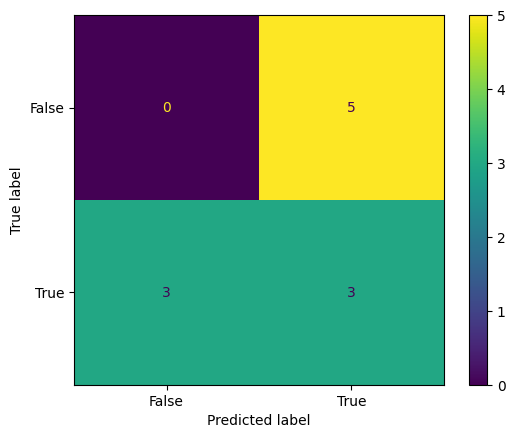

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [1 1 1 1 1 1 1 0 0 1 0]
1NN Accuracy: 0.2727272727272727
Subset 2 : 


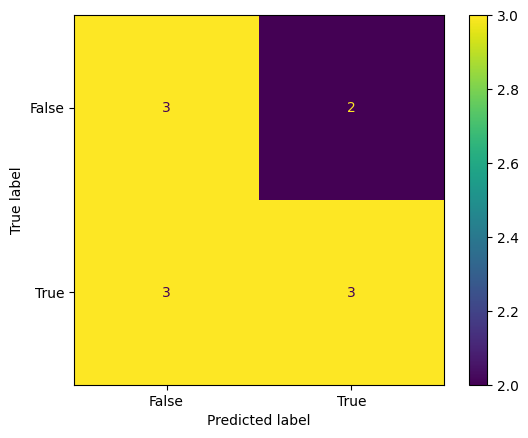

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [1 0 0 1 1 0 1 0 0 0 1]
1NN Accuracy: 0.5454545454545454
Subset 3 : 


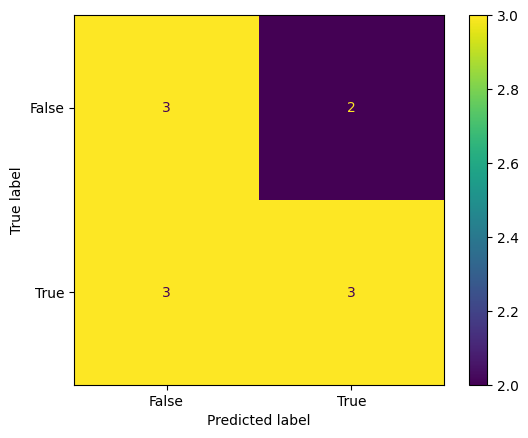

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [0 1 0 1 1 0 1 0 1 0 0]
1NN Accuracy: 0.5454545454545454
Subset 4 : 


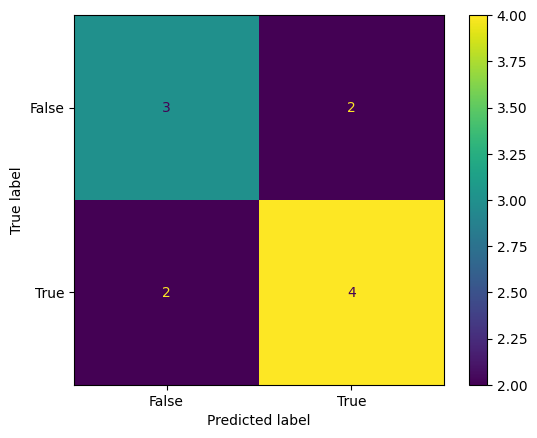

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [1 0 0 1 1 0 0 1 1 0 1]
1NN Accuracy: 0.6363636363636364
Subset 5 : 


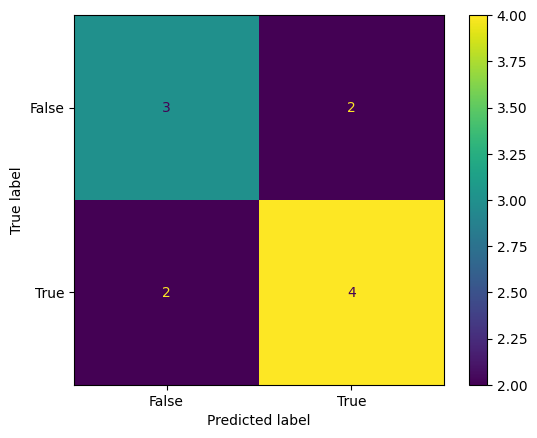

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [0 1 0 0 1 0 1 0 1 1 1]
1NN Accuracy: 0.6363636363636364


In [27]:
predicted_results = []
for i in range(len(datasets)):
    print("Subset " + str(i+1) + " : ")
    X_train, X_test, Y_train, Y_test = train_test_split(eval(datasets[i]), data2_Y, test_size=0.05, random_state=40)

    clf = KNeighborsClassifier(1)
    clf.fit(X_train, Y_train)

    Y_pred = clf.predict(X_test)
    predicted_results.append(Y_pred)
    
    confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()
    plt.show()
    
    print("Actual:   ", Y_test.to_numpy())
    print("Predicted:", Y_pred)
    print("1NN Accuracy: " + str(accuracy_score(Y_test, Y_pred)))

ans = []
for i in range(len(predicted_results[0])):
    count0 = 0
    count1 = 0
    
    for j in range(len(predicted_results)):
        if(predicted_results[j][i] == 0):
            count0 += 1
        else:
            count1 += 1
            
    ans.append(0 if(count0>count1) else 1)

In [28]:
print("Majority Voting: ")
print("Original: ", Y_test.to_numpy())
print("Majority: ", np.array(ans))

Majority Voting: 
Original:  [0 0 0 0 1 1 1 1 1 0 1]
Majority:  [1 1 0 1 1 0 1 0 1 0 1]


Subset 1 : 


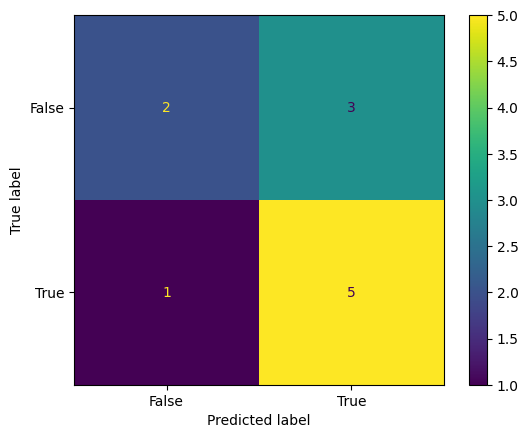

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [0 1 1 1 1 1 1 1 0 0 1]
3NN Accuracy: 0.6363636363636364
Subset 2 : 


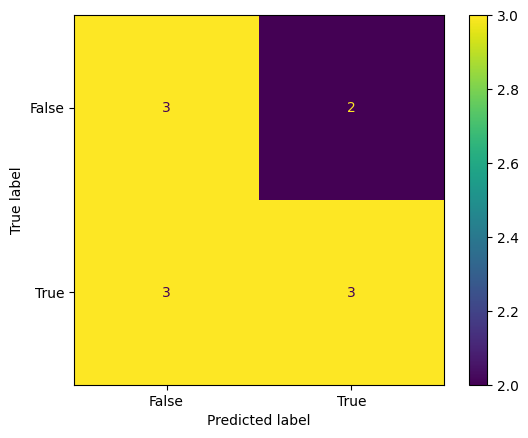

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [1 0 0 1 1 0 1 1 0 0 0]
3NN Accuracy: 0.5454545454545454
Subset 3 : 


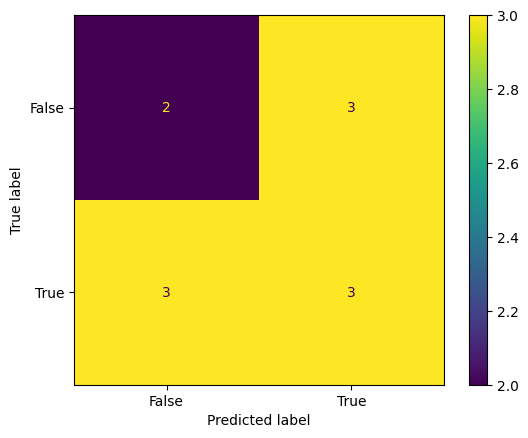

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [0 1 0 1 1 0 1 0 1 1 0]
3NN Accuracy: 0.45454545454545453
Subset 4 : 


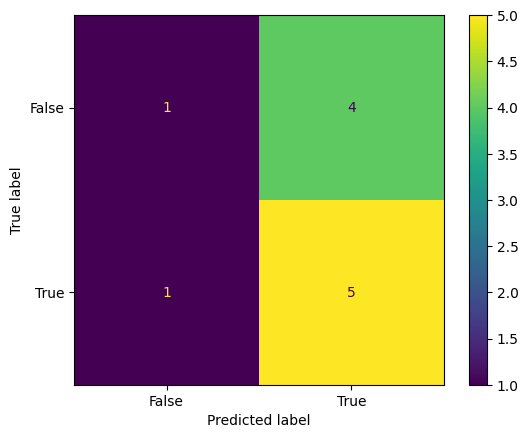

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [1 0 1 1 1 1 0 1 1 1 1]
3NN Accuracy: 0.5454545454545454
Subset 5 : 


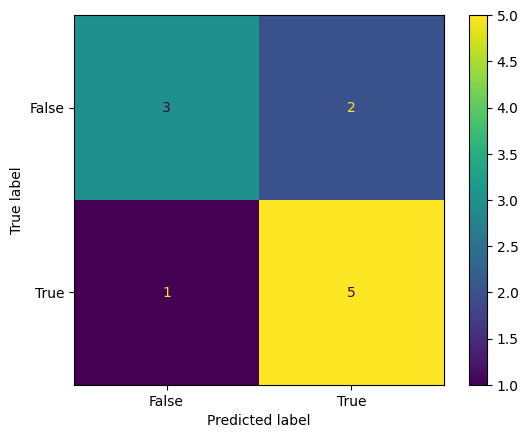

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [0 1 1 0 1 0 1 1 1 0 1]
3NN Accuracy: 0.7272727272727273
Majority Voting: 
Original:  [0 0 0 0 1 1 1 1 1 0 1]
Majority:  [0 1 1 1 1 0 1 1 1 0 1]


In [29]:
# 3NN
predicted_results = []
for i in range(len(datasets)):
    print("Subset " + str(i+1) + " : ")
    X_train, X_test, Y_train, Y_test = train_test_split(eval(datasets[i]), data2_Y, test_size=0.05, random_state=40)

    clf = KNeighborsClassifier(3)
    clf.fit(X_train, Y_train)

    Y_pred = clf.predict(X_test)
    predicted_results.append(Y_pred)
    
    confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()
    plt.show()
    
    print("Actual:   ", Y_test.to_numpy())
    print("Predicted:", Y_pred)
    print("3NN Accuracy: " + str(accuracy_score(Y_test, Y_pred)))

ans = []
for i in range(len(predicted_results[0])):
    count0 = 0
    count1 = 0
    
    for j in range(len(predicted_results)):
        if(predicted_results[j][i] == 0):
            count0 += 1
        else:
            count1 += 1
            
    ans.append(0 if(count0>count1) else 1)
    
print("Majority Voting: ")
print("Original: ", Y_test.to_numpy())
print("Majority: ", np.array(ans))

Subset 1 : 


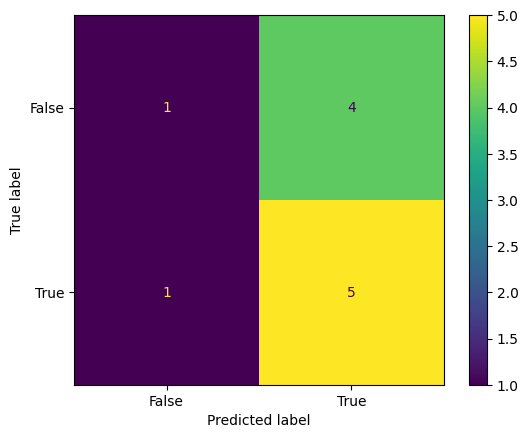

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [1 1 1 1 1 1 1 1 0 0 1]
5NN Accuracy: 0.5454545454545454
Subset 2 : 


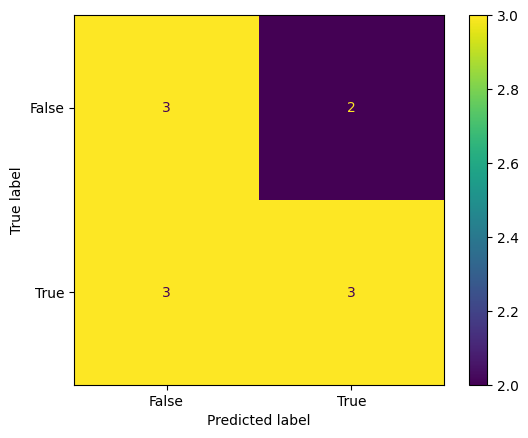

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [1 1 0 0 1 0 1 0 0 0 1]
5NN Accuracy: 0.5454545454545454
Subset 3 : 


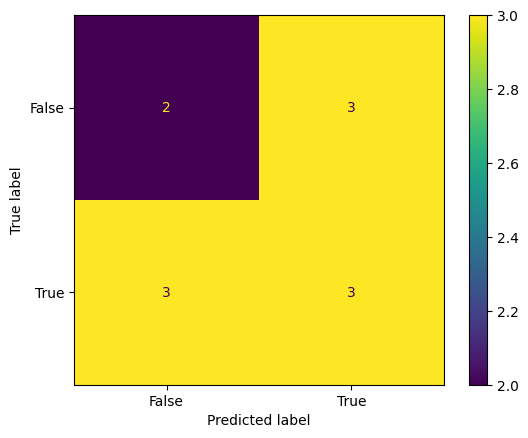

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [0 1 0 1 1 0 1 0 1 1 0]
5NN Accuracy: 0.45454545454545453
Subset 4 : 


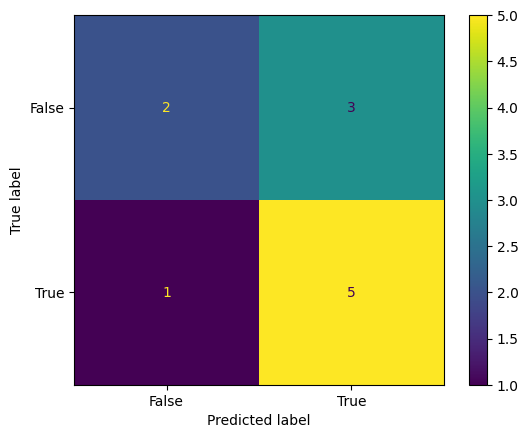

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [1 0 1 1 1 1 0 1 1 0 1]
5NN Accuracy: 0.6363636363636364
Subset 5 : 


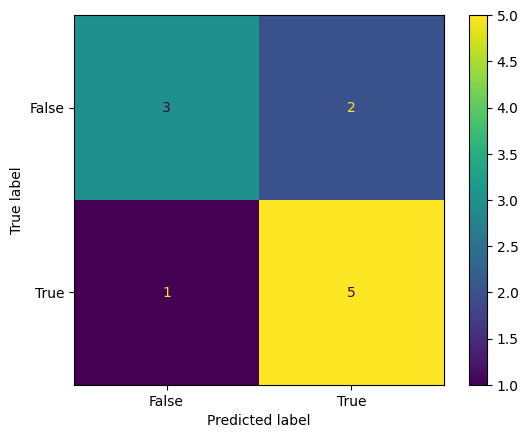

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [0 1 1 0 1 0 1 1 1 0 1]
5NN Accuracy: 0.7272727272727273
Majority Voting: 
Original:  [0 0 0 0 1 1 1 1 1 0 1]
Majority:  [1 1 1 1 1 0 1 1 1 0 1]


In [30]:
# 5NN
predicted_results = []
for i in range(len(datasets)):
    print("Subset " + str(i+1) + " : ")
    X_train, X_test, Y_train, Y_test = train_test_split(eval(datasets[i]), data2_Y, test_size=0.05, random_state=40)

    clf = KNeighborsClassifier(5)
    clf.fit(X_train, Y_train)

    Y_pred = clf.predict(X_test)
    predicted_results.append(Y_pred)
    
    confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()
    plt.show()
    
    print("Actual:   ", Y_test.to_numpy())
    print("Predicted:", Y_pred)
    print("5NN Accuracy: " + str(accuracy_score(Y_test, Y_pred)))

ans = []
for i in range(len(predicted_results[0])):
    count0 = 0
    count1 = 0
    
    for j in range(len(predicted_results)):
        if(predicted_results[j][i] == 0):
            count0 += 1
        else:
            count1 += 1
            
    ans.append(0 if(count0>count1) else 1)
    
print("Majority Voting: ")
print("Original: ", Y_test.to_numpy())
print("Majority: ", np.array(ans))

Subset 1 : 


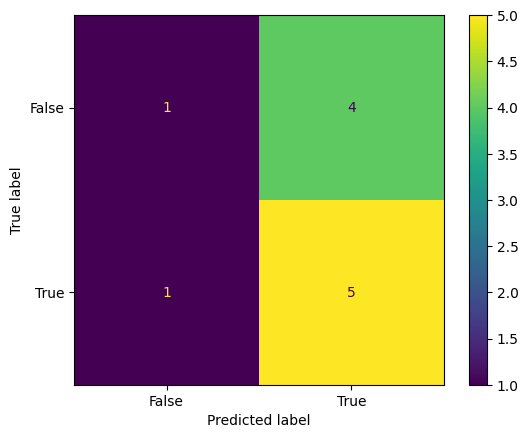

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [1 1 1 1 1 1 1 1 0 0 1]
7NN Accuracy: 0.5454545454545454
Subset 2 : 


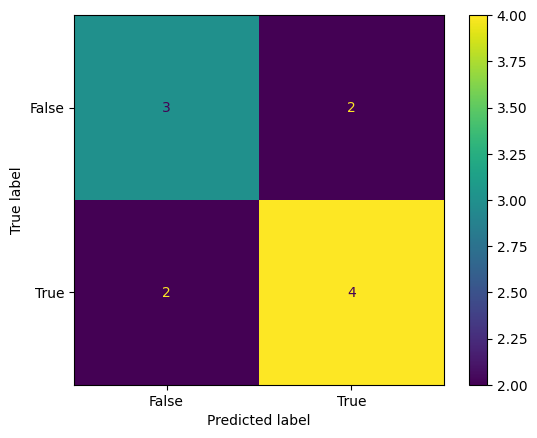

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [1 1 0 0 1 0 1 1 0 0 1]
7NN Accuracy: 0.6363636363636364
Subset 3 : 


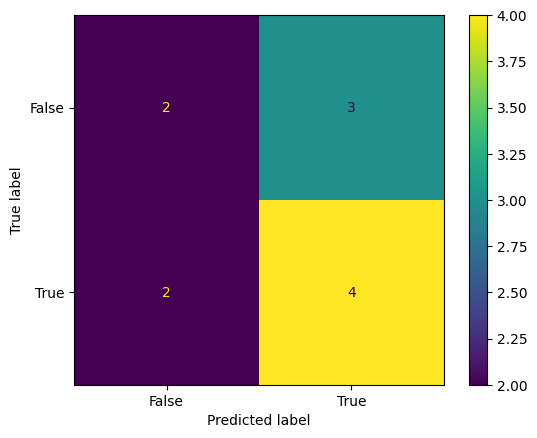

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [0 1 0 1 1 0 1 1 1 1 0]
7NN Accuracy: 0.5454545454545454
Subset 4 : 


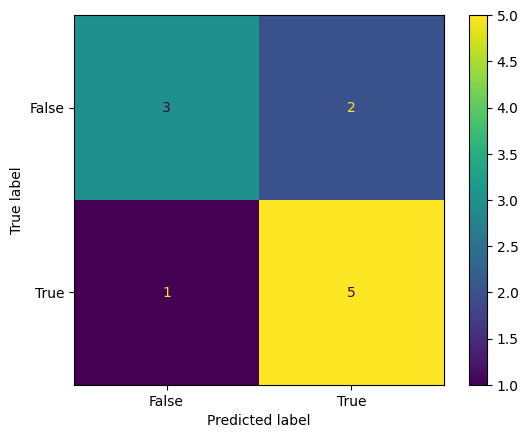

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [1 0 1 0 1 1 0 1 1 0 1]
7NN Accuracy: 0.7272727272727273
Subset 5 : 


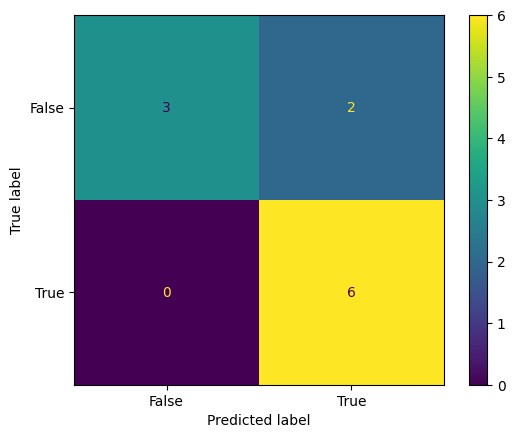

Actual:    [0 0 0 0 1 1 1 1 1 0 1]
Predicted: [0 0 1 1 1 1 1 1 1 0 1]
7NN Accuracy: 0.8181818181818182
Majority Voting: 
Original:  [0 0 0 0 1 1 1 1 1 0 1]
Majority:  [1 1 1 1 1 1 1 1 1 0 1]


In [31]:
# 7NN
# 3NN
predicted_results = []
for i in range(len(datasets)):
    print("Subset " + str(i+1) + " : ")
    X_train, X_test, Y_train, Y_test = train_test_split(eval(datasets[i]), data2_Y, test_size=0.05, random_state=40)

    clf = KNeighborsClassifier(7)
    clf.fit(X_train, Y_train)

    Y_pred = clf.predict(X_test)
    predicted_results.append(Y_pred)
    
    confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()
    plt.show()
    
    print("Actual:   ", Y_test.to_numpy())
    print("Predicted:", Y_pred)
    print("7NN Accuracy: " + str(accuracy_score(Y_test, Y_pred)))

ans = []
for i in range(len(predicted_results[0])):
    count0 = 0
    count1 = 0
    
    for j in range(len(predicted_results)):
        if(predicted_results[j][i] == 0):
            count0 += 1
        else:
            count1 += 1
            
    ans.append(0 if(count0>count1) else 1)
    
print("Majority Voting: ")
print("Original: ", Y_test.to_numpy())
print("Majority: ", np.array(ans))

When divided the features into 5 subsets the accuract got reduced very much. Only 6/11 are correct in 1NN

Got 7/11 in 3NN

Got 6/11 in 5NN

Got 7/11 in 7NN